In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings

import sys
sys.path.append("../../") # Add root directory to path

from src.preprocessing.PSF_Preprocessing import get_PSF_frames, get_PSF_frames_movie_list, show_PSFs, load_tif_movies
from src.utils.PSFDataset import MultiPSFDataset

In [2]:
A647_movies = load_tif_movies(r'Raw Data\A647')
CF660_movies = load_tif_movies(r'Raw Data\CF660c')
print(len(A647_movies), len(CF660_movies))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Raw Data\\A647'

In [3]:
# Take every 5th frame to reduce overlapping PSFs
A647_movies = [movie[::5] for movie in A647_movies]
CF660_movies = [movie[::5] for movie in CF660_movies]

# A647 vs CF660c + Normalization

In [4]:
minmass = 1500
separation = 15
diameter = 9
frame_size = 19
percentile =99.5
movie_frames = [0, 3, 7, 12, 18]
plot = False
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    if plot:
        A647_PSFs_training = get_PSF_frames(A647_movies[0], minmass, separation, diameter, frame_size, 
                                            percentile, print_progress=False, to_plot=True, movie_frames=movie_frames)
    A647_PSFs_training = get_PSF_frames_movie_list(A647_movies[0:6], minmass, separation, diameter, frame_size, 
                                                   percentile, print_progress=True)
    A647_PSFs_testing = get_PSF_frames_movie_list(A647_movies[6:], minmass, separation, diameter, frame_size, 
                                                  percentile, print_progress=True)

Processing Movie 1/6


100%|██████████| 20/20 [00:00<00:00, 22.13it/s]


Processing Movie 2/6


100%|██████████| 20/20 [00:00<00:00, 20.80it/s]


Processing Movie 3/6


100%|██████████| 200/200 [00:09<00:00, 21.50it/s]


Processing Movie 4/6


100%|██████████| 200/200 [00:08<00:00, 22.55it/s]


Processing Movie 5/6


100%|██████████| 200/200 [00:09<00:00, 21.51it/s]


Processing Movie 6/6


100%|██████████| 20/20 [00:00<00:00, 20.36it/s]


Processing Movie 1/2


100%|██████████| 20/20 [00:00<00:00, 20.28it/s]


Processing Movie 2/2


100%|██████████| 20/20 [00:00<00:00, 24.91it/s]


In [5]:
print(len(A647_PSFs_training), len(A647_PSFs_testing))

40075 1348


(40075, 19, 19)


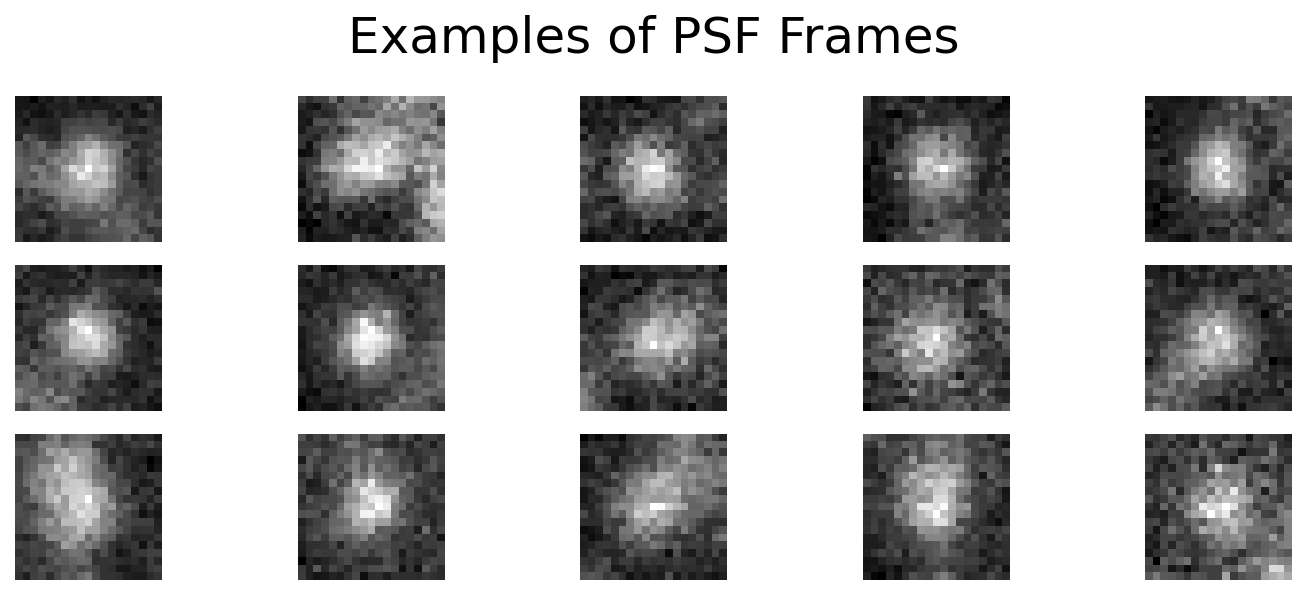

In [6]:
show_PSFs(A647_PSFs_training)

In [7]:
minmass = 1500
separation = 15
diameter = 9
frame_size = 19
percentile =99.5
movie_frames = [0, 3, 7, 12, 18]
plot = False
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    if plot:
        CF660_PSFs_training = get_PSF_frames(CF660_movies[0], minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=False, to_plot=True, movie_frames=movie_frames)
    CF660_PSFs_training = get_PSF_frames_movie_list(CF660_movies[:11], minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=True)
    CF660_PSFs_testing = get_PSF_frames_movie_list(CF660_movies[11:], minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=True)

Processing Movie 1/11


100%|██████████| 200/200 [00:02<00:00, 94.28it/s] 


Processing Movie 2/11


100%|██████████| 200/200 [00:02<00:00, 92.03it/s]


Processing Movie 3/11


100%|██████████| 200/200 [00:02<00:00, 97.21it/s] 


Processing Movie 4/11


100%|██████████| 200/200 [00:02<00:00, 97.11it/s] 


Processing Movie 5/11


100%|██████████| 200/200 [00:02<00:00, 99.42it/s] 


Processing Movie 6/11


100%|██████████| 200/200 [00:01<00:00, 101.79it/s]


Processing Movie 7/11


100%|██████████| 200/200 [00:02<00:00, 98.93it/s] 


Processing Movie 8/11


100%|██████████| 200/200 [00:02<00:00, 90.01it/s]


Processing Movie 9/11


100%|██████████| 200/200 [00:02<00:00, 90.41it/s]


Processing Movie 10/11


100%|██████████| 200/200 [00:02<00:00, 82.25it/s]


Processing Movie 11/11


100%|██████████| 200/200 [00:02<00:00, 89.17it/s]


Processing Movie 1/1


100%|██████████| 200/200 [00:01<00:00, 101.33it/s]


In [8]:
print(len(CF660_PSFs_training), len(CF660_PSFs_testing))

29231 2581


(29231, 19, 19)


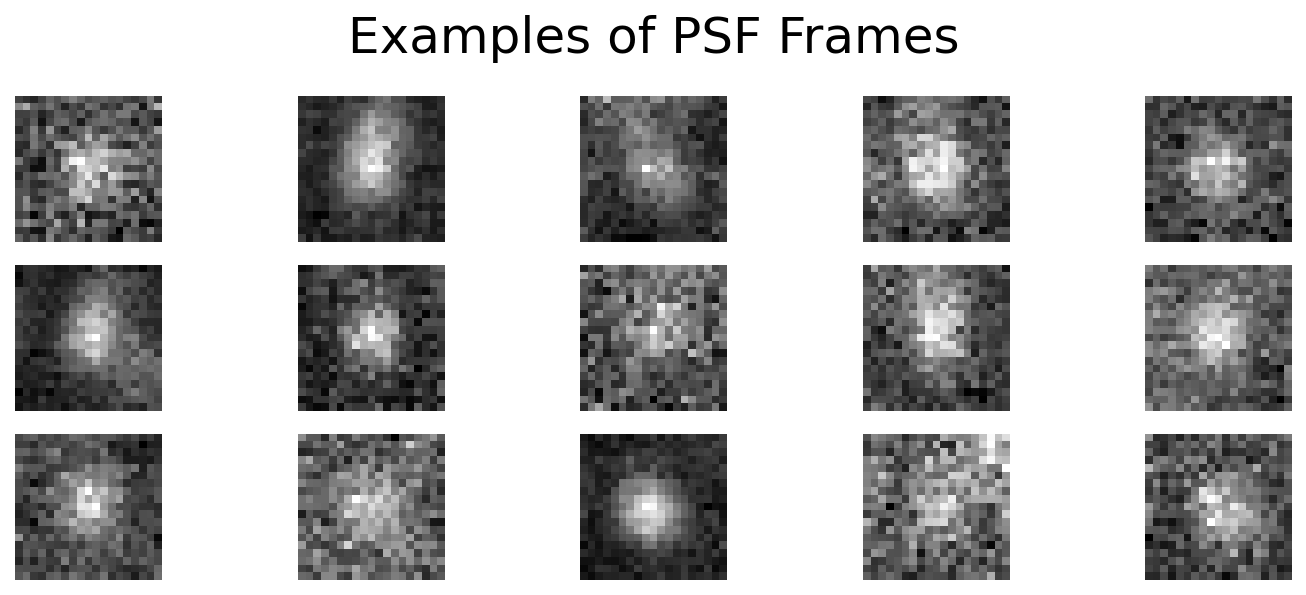

In [9]:
show_PSFs(CF660_PSFs_training)

In [10]:
# Raw Data
raw_training = MultiPSFDataset.create_from_PSFs([A647_PSFs_training, CF660_PSFs_training], 
                                                class_names=["A647", "CF660c"], normalize=False)
raw_testing = MultiPSFDataset.create_from_PSFs([A647_PSFs_testing, CF660_PSFs_testing], 
                                                class_names=["A647", "CF660c"], normalize=False)
raw_training.save('Pytorch Datasets/Normalization/Raw/raw_training.pt')
raw_testing.save('Pytorch Datasets/Normalization/Raw/raw_testing.pt')


norm_training = MultiPSFDataset.create_from_PSFs([A647_PSFs_training, CF660_PSFs_training], 
                                                class_names=["A647", "CF660c"], normalize=True)
norm_testing = MultiPSFDataset.create_from_PSFs([A647_PSFs_testing, CF660_PSFs_testing], 
                                                class_names=["A647", "CF660c"], normalize=True)
norm_training.save('Pytorch Datasets/Normalization/Normalized/norm_training.pt')
norm_testing.save('Pytorch Datasets/Normalization/Normalized/norm_testing.pt')

# A647_vs_CF660c_all_13px.pt

In [4]:
minmass = 1500
separation = 15
diameter = 9
frame_size = 13
percentile =99.5
movie_frames = [0, 3, 7, 12, 18]
plot = False
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    if plot:
        A647_PSFs_training = get_PSF_frames(A647_movies[0], minmass, separation, diameter, frame_size, 
                                            percentile, print_progress=False, to_plot=True, movie_frames=movie_frames)
    A647_PSFs_training = get_PSF_frames_movie_list(A647_movies, minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=True)

Processing Movie 1/8


100%|██████████| 20/20 [00:01<00:00, 19.38it/s]


Processing Movie 2/8


100%|██████████| 20/20 [00:01<00:00, 17.45it/s]


Processing Movie 3/8


100%|██████████| 200/200 [00:10<00:00, 19.68it/s]


Processing Movie 4/8


100%|██████████| 200/200 [00:08<00:00, 22.52it/s]


Processing Movie 5/8


100%|██████████| 200/200 [00:09<00:00, 20.95it/s]


Processing Movie 6/8


100%|██████████| 20/20 [00:00<00:00, 20.76it/s]


Processing Movie 7/8


100%|██████████| 20/20 [00:00<00:00, 20.50it/s]


Processing Movie 8/8


100%|██████████| 20/20 [00:00<00:00, 24.07it/s]


(42183, 13, 13)


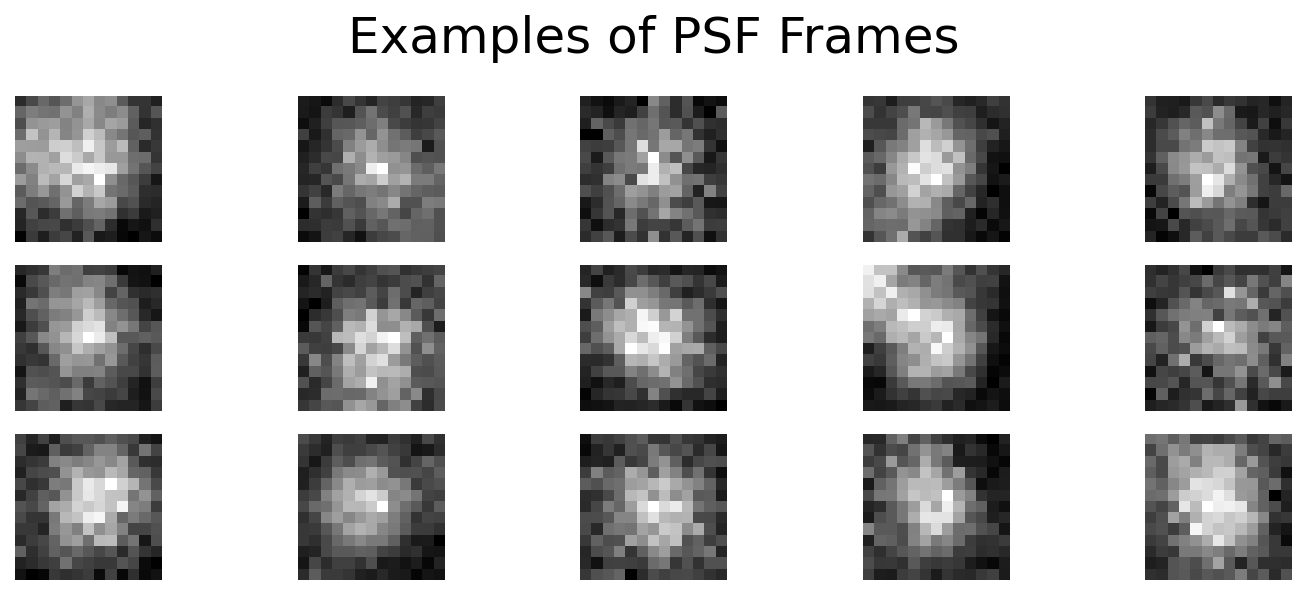

In [5]:
show_PSFs(A647_PSFs_training)

In [6]:
minmass = 1500
separation = 15
diameter = 9
frame_size = 13
percentile =99.5
movie_frames = [0, 3, 7, 12, 18]
plot = False
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    if plot:
        CF660_PSFs_training = get_PSF_frames(CF660_movies[0], minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=False, to_plot=True, movie_frames=movie_frames)
    CF660_PSFs_training = get_PSF_frames_movie_list(CF660_movies, minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=True)

Processing Movie 1/12


100%|██████████| 200/200 [00:02<00:00, 93.75it/s] 


Processing Movie 2/12


100%|██████████| 200/200 [00:02<00:00, 90.58it/s]


Processing Movie 3/12


100%|██████████| 200/200 [00:02<00:00, 93.93it/s] 


Processing Movie 4/12


100%|██████████| 200/200 [00:02<00:00, 94.59it/s] 


Processing Movie 5/12


100%|██████████| 200/200 [00:02<00:00, 95.49it/s]


Processing Movie 6/12


100%|██████████| 200/200 [00:02<00:00, 98.54it/s] 


Processing Movie 7/12


100%|██████████| 200/200 [00:01<00:00, 101.74it/s]


Processing Movie 8/12


100%|██████████| 200/200 [00:02<00:00, 93.27it/s]


Processing Movie 9/12


100%|██████████| 200/200 [00:02<00:00, 91.53it/s]


Processing Movie 10/12


100%|██████████| 200/200 [00:02<00:00, 80.70it/s]


Processing Movie 11/12


100%|██████████| 200/200 [00:02<00:00, 96.27it/s] 


Processing Movie 12/12


100%|██████████| 200/200 [00:02<00:00, 97.06it/s] 


(33503, 13, 13)


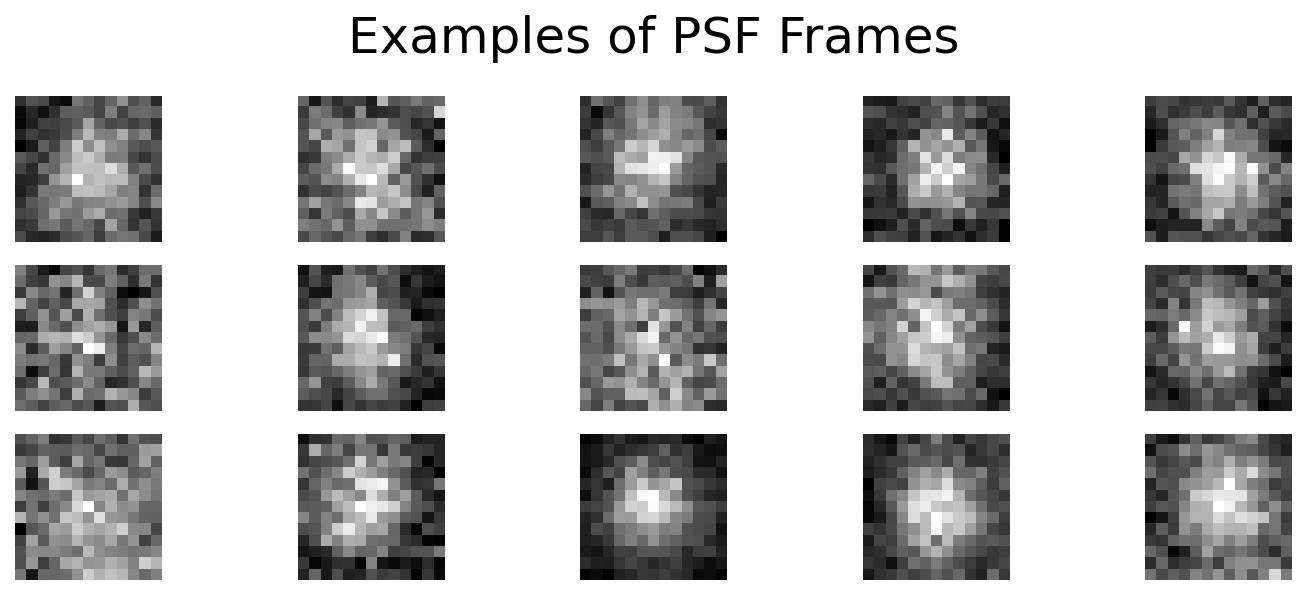

In [7]:
show_PSFs(CF660_PSFs_training)

In [8]:
PSF_Data = MultiPSFDataset.create_from_PSFs([A647_PSFs_training, CF660_PSFs_training], 
                                             class_names=["A647", "CF660c"])
PSF_Data.save('Pytorch Datasets/Cover Slip (A647 CF660c)/A647_vs_CF660c_all_13px.pt')